<a href="https://colab.research.google.com/github/Temerius/ML/blob/main/Task_01_EPAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [348]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### L2

[ 2.97180702e+02 -5.17081503e+00 -7.99202390e+00 -8.30027539e+00
 -9.12537483e-01  5.02521181e-01 -5.27106422e-02  1.96112651e-03]


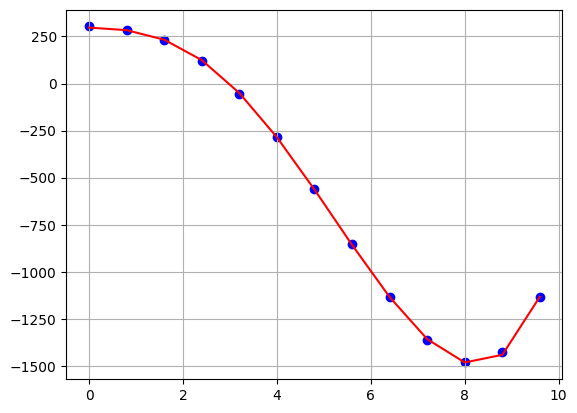

In [351]:
x = np.arange(0, 10.1, 0.8)
y = np.array([1 * a ** 4 - 10 * a ** 3 - 11 * a ** 2 - 7 * a + 303 for a in x])
N = 8
A = 2 #if A == 0 - no regularization

X = np.array([[a ** n for n in range(N)] for a in x])
IA = np.array([[A if i == j else 0 for j in range(N)] for i in range(N)])
IA[0][0] = 0
X_train = X[::2]
Y = y[::2]

M = np.linalg.inv(X_train.T @ X_train + IA)
w = M @ X_train.T @ Y
print(w)

yy = [np.dot(w, x) for x in X]
plt.plot(x, yy, c='RED')

plt.scatter(x, y, c='BLUE')

plt.grid(True)
plt.show()

### L1

In [347]:
#Hyperparameters
N = 8
A = 4
Eps = 0.00000003
epochs = 5000

In [294]:
#Creation of dataset
x = np.arange(0, 10.1, 0.8)
y = np.array([1 * a ** 4 - 10 * a ** 3 - 11 * a ** 2 - 7 * a + 303 for a in x])

X = np.array([[a ** n for n in range(N)] for a in x])

X_train = X[::2]
Y_train = y[::2]
X_test = X[1::2]
Y_test = y[1::2]

In [295]:
def calculate_loss(Y, X, w, a):
    return np.sum((Y - X @ w) ** 2) / len(X) + a * np.sum(np.abs(w))

In [296]:
def update_weights(Y, X, w, a, eps):
    #print(np.sign(w))
    #print(eps * -X.T @ (Y - X @ w))
    return w - eps * (-X.T @ (Y - X @ w) + a * np.sign(w))

In [297]:
w = np.random.normal(0, 0.5, (N))
print(w)
w = np.array([-0.07721009,  0.31478874,  0.27540538, -0.96237129, -0.8671762, 0.5745359, -0.20942741, -0.23019736])
#w = np.array([0.18102716, 0.25708428])
#w = np.array[0.9317948, 0.54703829, -0.65366984, -0.36564025,  0.37724835]

[ 0.05092786 -0.00759786  0.28034059  0.54308974 -0.42923917 -0.13843649
 -0.42760888  0.34201025]


100%|██████████| 50000000/50000000 [36:56<00:00, 22556.24it/s]


w:[-0.07568867  0.31284056  0.26101566 -1.03187411 -1.12822701 -0.0518153
  0.03526111 -0.00186781]


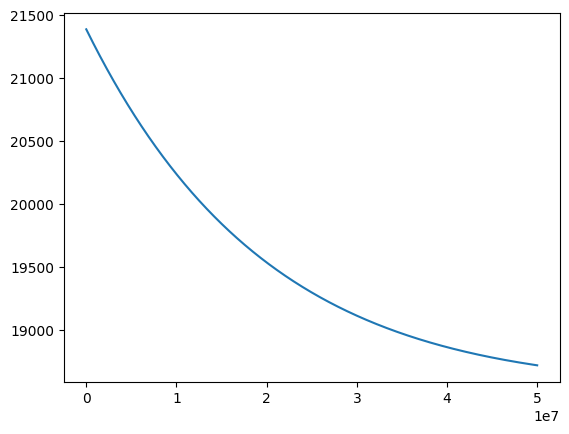

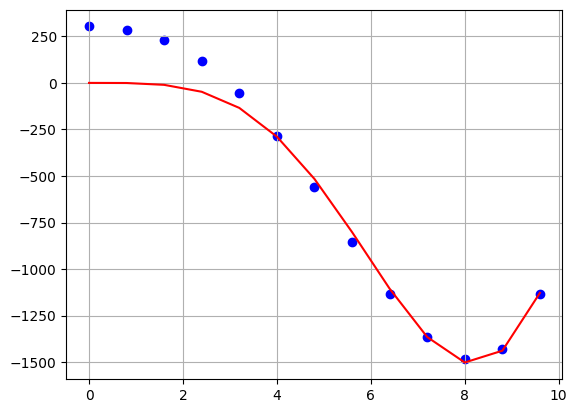

In [349]:
train_loss_arr = []
test_loss_arr = []
for _ in tqdm(range(epochs)):
    test_loss = calculate_loss(Y_train, X_train, w, A)
    train_loss = calculate_loss(Y_test, X_test, w, A)

    test_loss_arr.append(test_loss)
    train_loss_arr.append(train_loss)

    w = update_weights(Y_train, X_train, w, A, Eps)

print(f'w:{w}')

plt.plot(range(epochs), train_loss_arr)
plt.show()
'''
yy = [np.dot(w, x) for x in X[1::2]]
#plt.plot(x[1::2], yy, c='RED')
yyy = [np.dot(w, x) for x in X_train]
plt.plot(x[::2], yyy, c='MAGENTA')
'''
yyyy = [np.dot(w, x) for x in X]
plt.plot(x, yyyy, c='RED')

#plt.plot(x[::2], Y_train, c='GREEN')
plt.scatter(x,y, c='BLUE')
plt.grid(True)
plt.show()


### Probability

In [ ]:
import random
from tqdm import tqdm
epochs = 100000000
l = 100002

count = 0
for _ in tqdm(range(epochs)):
    a = random.randint(0, l)
    b = random.randint(0, l)
    if a > b: a, b = b, a

    if b-a >= l // 3:
        count += 1

print(f'Probability = {count/epochs}')

100%|██████████| 100000000/100000000 [04:50<00:00, 343947.67it/s]

Probability = 0.44446561


### Python

In [2]:
class A():
    pass

obj1 = A()
obj2 = A()

In [10]:
print(f'object1 id = {id(obj1)}, \nobject2 id = {id(obj2)}')
print(f'object1 equals object2 {obj1 == obj2}, \nhash object1 equals hash object2 {hash(obj1) == hash(obj2)}')

object1 id = 137125920211632, 
object2 id = 137125920215136
object1 equals object2 False, 
hash object1 equals hash object2 False


In [12]:
print(f'hash object1 using hash function = {hash(obj1)}')
print(f'id object1 // 16 = {id(obj1) // 16}')

hash object1 using hash function = 8570370013227
id object1 // 16 = 8570370013227


In [22]:
class B():
    def __hash__(self):
        print(f'execute __hash__')
        return 4

    def __eq__(self, other):
        print(f'execute __eq__')
        return True

obj1 = B()
obj2 = B()

In [23]:
print(f'object1 id = {id(obj1)}, \nobject2 id = {id(obj2)}')
print(f'object1 equals object2 {obj1 == obj2}, \nhash object1 equals hash object2 {hash(obj1) == hash(obj2)}')

object1 id = 137125068258176, 
object2 id = 137125068252752
execute __eq__
execute __hash__
execute __hash__
object1 equals object2 True, 
hash object1 equals hash object2 True


In [26]:
d = {}
d[obj1] = 'object1'
print(d[obj2])
print('-------------')
obj2.data = 5
print(d[obj2])

execute __hash__
execute __hash__
execute __eq__
object1
-------------
execute __hash__
execute __eq__
object1


In [27]:
class C():
    def __hash__(self):
        print(f'execute __hash__')
        return 4

    def __eq__(self, other):
        print(f'execute __eq__')
        return False

obj1 = C()
obj2 = C()

In [29]:
d = {}
d[obj1] = 'object1'
d[obj2]

execute __hash__
execute __hash__
execute __eq__


KeyError: <__main__.C object at 0x7cb6eafbada0>

In [45]:
class Worker():
    def __init__(self, salary, age, name):
        self.salary = salary
        self.age = age
        self.name = name

    def __hash__(self):
        print(f'execute __hash__')
        return hash((self.salary, self.age))

    def __eq__(self, other):
        print(f'execute __eq__')
        return self.name == other.name

worker1 = Worker(salary=5, age=21, name='Qwerty')
worker2 = Worker(salary=6, age=21, name='Asdfg')

In [46]:
workers_dict = {}
workers_dict[worker1] = 'school'
workers_dict[worker2] = 'office'
workers_dict

execute __hash__
execute __hash__
execute __hash__
execute __hash__


{<__main__.Worker at 0x7cb6eae71bd0>: 'school',
 <__main__.Worker at 0x7cb6eae705e0>: 'office'}

In [47]:
worker1.salary = 6
workers_dict = {}
workers_dict[worker1] = 'school'
workers_dict[worker2] = 'office'
print('-----------------')
workers_dict

execute __hash__
execute __hash__
execute __eq__
-----------------
execute __hash__
execute __hash__
execute __eq__


{<__main__.Worker at 0x7cb6eae71bd0>: 'school',
 <__main__.Worker at 0x7cb6eae705e0>: 'office'}

In [48]:
worker2.name = worker1.name
workers_dict = {}
workers_dict[worker1] = 'school'
workers_dict[worker2] = 'office'
print('---------------')
workers_dict

execute __hash__
execute __hash__
execute __eq__
---------------
execute __hash__


{<__main__.Worker at 0x7cb6eae71bd0>: 'office'}